<a href="https://colab.research.google.com/github/jessica8403/TIL/blob/master/cnn%EB%AF%B9%EC%8A%A4%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import warnings
warnings.filterwarnings(action='ignore')

os.environ["CUDA_VISIBLE_DEVICES"]="0" # GPU 할당


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


#데이터로드


In [ ]:
#create training dataset
from glob import glob
import numpy as np
import PIL
from PIL import Image

path = '/content/drive/MyDrive/멀티캠퍼스/data/train/'

training_images = []
training_labels = []

for filename in glob(path +"*"):
    for img in glob(filename + "/*.jpg"):
        an_img = PIL.Image.open(img) #read img
        img_array = np.array(an_img) #img to array
        training_images.append(img_array) #append array to training_images 
        label = filename.split('/')[7] #get label
        training_labels.append(label) #append label
        
training_images = np.array(training_images)
training_labels = np.array(training_labels)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
training_labels= le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1,1)

print(training_images.shape)
print(training_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [ ]:

path = '/content/drive/MyDrive/멀티캠퍼스/data/test/'

test_images = []
test_idx = []

flist = sorted(glob(path + '*.jpg'))

for filename in flist:
    an_img = PIL.Image.open(filename) #read img
    img_array = np.array(an_img) #img to array
    test_images.append(img_array) #append array to training_images 
    
    label = filename.split('/')[7] #get id 
    test_idx.append(label) #append id
    
test_images = np.array(test_images)

print(test_images.shape)
print(test_idx[0:5])

(10000, 32, 32, 3)
['0000.jpg', '0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg']


데이터셋보기

[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],

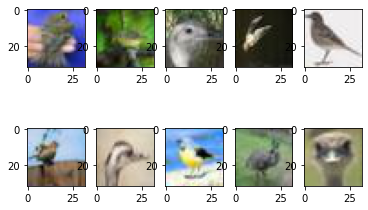

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(training_images[i])
    print(training_labels[i], end=",")
plt.show()

In [ ]:
label_num = [0,1,2,3,4,5,6,7,8,9]
label_name = le.inverse_transform(label_num)

for i in range(10):
    print(label_num[i], label_name[i])

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


#테스트셋 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(training_images, training_labels, test_size=0.2, random_state=42)

X_test = test_images

In [ ]:
print('X_train 크기:',X_train.shape)
print('X_valid 크기:',X_valid.shape)
print('X_test  크기:',X_test.shape)

X_train 크기: (40000, 32, 32, 3)
X_valid 크기: (10000, 32, 32, 3)
X_test  크기: (10000, 32, 32, 3)


In [ ]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

#CNN 모델설계

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), #pooling layer
    tf.keras.layers.Dropout(0.23), # 무작위로 퍼셉트론 비활성화(23%)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
    tf.keras.layers.Dropout(0.23),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
    tf.keras.layers.Dropout(0.23),
    tf.keras.layers.Flatten(), # N차원 배열 -> 1차원 배열
    tf.keras.layers.Dense(1024, activation = 'relu'), #fully connected layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax') # ouput layer
])

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 32)         

In [ ]:
data=model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=1, batch_size=128)

313/313 [==============================] - 12s 7ms/step - loss: 1.8187 - accuracy: 0.3258 - val_loss: 1.5595 - val_accuracy: 0.4478


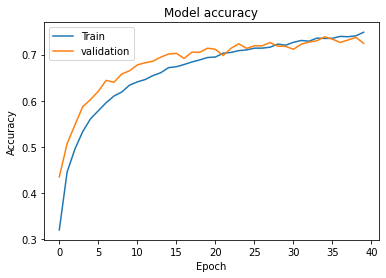

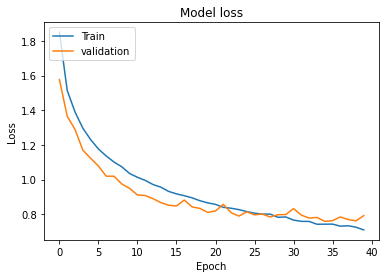

In [ ]:
import matplotlib.pyplot as plot

plot.plot(data.history['accuracy'])
plot.plot(data.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'validation'], loc='upper left')
plot.show()

plot.plot(data.history['loss'])
plot.plot(data.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'validation'], loc='upper left')
plot.show()

# 증식(mix up augmentation)

데이터전처리

In [ ]:
# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=30,
    brightness_range = [0.8, 1.0],
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)

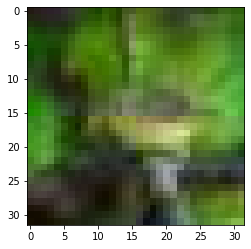

In [ ]:
sample_image = training_images[1]
plt.imshow(sample_image.astype('uint8'))
sample_image = np.expand_dims(sample_image, 0)

In [ ]:
sample_image_it = image_generator.flow(sample_image, batch_size=1)

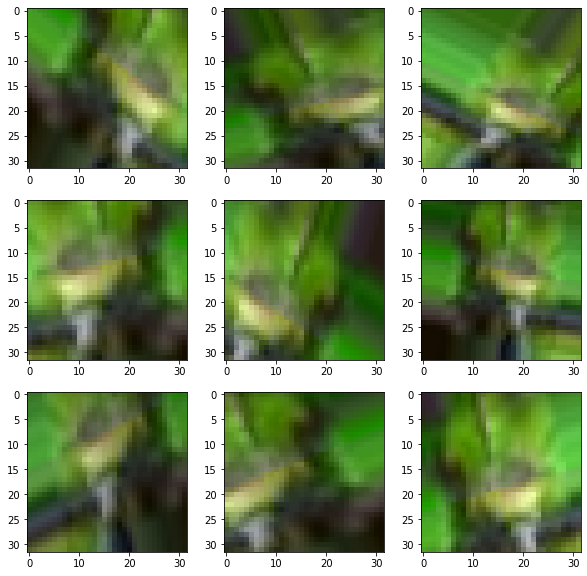

In [ ]:
fig = plt.figure(figsize = (10,10))
for i in range(9):
    plt.subplot(3, 3, 1+i)
    batch = sample_image_it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [ ]:
augment_size=100000

random_mask = np.random.randint(training_images.shape[0], size=augment_size)
training_image_aug = training_images[random_mask].copy()
training_labels_aug = training_labels[random_mask].copy()

In [ ]:
training_image_aug = image_generator.flow(training_image_aug, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

training_images = np.concatenate((training_images, training_image_aug))
training_labels = np.concatenate((training_labels, training_labels_aug))

In [ ]:
print(training_images.shape)
print(training_labels.shape)

(150000, 32, 32, 3)
(150000, 1)


tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)


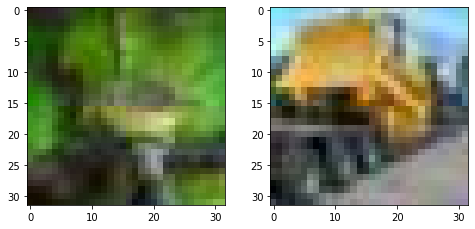

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

sample_image = training_images[1]
sample_label = tf.one_hot(training_labels[1], 10) 

sample_image2 = training_images[5001]
sample_label2 = tf.one_hot(training_labels[5001], 10)

fig = plt.figure(figsize = (8,8))

plt.subplot(2, 2, 1)
plt.imshow(sample_image.astype('uint8'))
print(sample_label)

plt.subplot(2, 2, 2)
plt.imshow(sample_image2.astype('uint8'))
print(sample_label2)
    
plt.show()

In [ ]:
def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


def mix_up(ds_one, ds_two, batch_size = 1, alpha=0.5):
    # Unpack two datasets
    images_one, labels_one = ds_one
    images_two, labels_two = ds_two

    # Sample lambda and reshape it to do the mixup
    l = sample_beta_distribution(batch_size, alpha, alpha)
    x_l = tf.reshape(l, (batch_size, 1, 1, 1))
    y_l = tf.reshape(l, (batch_size, 1))

    # Perform mixup on both images and labels by combining a pair of images/labels
    # (one from each dataset) into one image/label
    images = images_one * x_l + images_two * (1 - x_l)
    labels = labels_one * y_l + labels_two * (1 - y_l)
    return (images, labels)

[0.0, 0.0, 0.3837844729423523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6162155270576477]
[0.0, 0.0, 0.0010585743002593517, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9989414215087891]
[0.0, 0.0, 0.5299530625343323, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4700469374656677]
[0.0, 0.0, 0.4734334647655487, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5265665054321289]
[0.0, 0.0, 0.29447418451309204, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.705525815486908]
[0.0, 0.0, 0.871533215045929, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12846678495407104]
[0.0, 0.0, 0.33716145157814026, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6628385782241821]
[0.0, 0.0, 0.9136892557144165, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0863107442855835]
[0.0, 0.0, 0.2452724128961563, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7547276020050049]


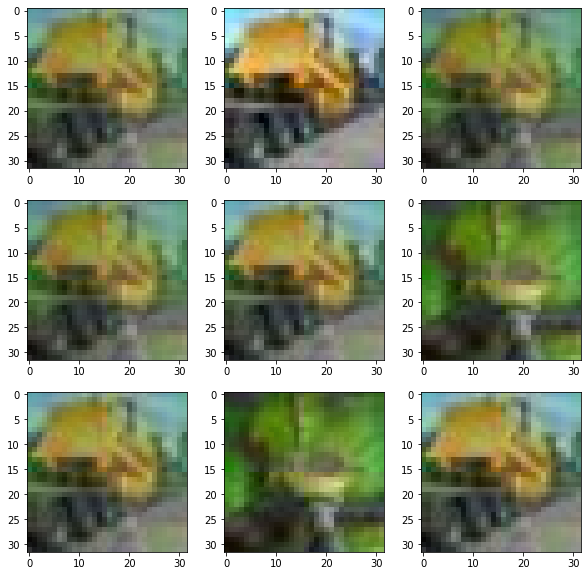

In [ ]:
mix_image, mix_label = mix_up((sample_image, sample_label), (sample_image2, sample_label2), batch_size = 9, alpha = 0.5)

fig = plt.figure(figsize = (10,10))
for i in range(9):
    plt.subplot(3, 3, 1+i)
    image = mix_image[i]
    plt.imshow(image.numpy().squeeze().astype('uint8'))
    print(mix_label[i].numpy().tolist())

In [ ]:
import random
from sys import stdout

training_labels = tf.one_hot(training_labels, 10) 

mix_training_images = []
mix_training_labels = []

for i in range(2):
    random_num = random.sample(range(0,50000), 50000)
    print("\nAttempt", i)
    progress_before = 0

    for i in range(0,50000,2):
        image_1 = training_images[random_num[i]]
        label_1 = training_labels[random_num[i]]

        image_2 = training_images[random_num[i+1]]
        label_2 = training_labels[random_num[i+1]]

        mix_image, mix_label = mix_up((sample_image, sample_label), (sample_image2, sample_label2), alpha = 0.4)

        mix_training_images.append(mix_image[0])
        mix_training_labels.append(mix_label[0])
        
        #just for ui
        progress = int(100*(i/49998))
        if progress != progress_before:
            progress_before = progress
            stdout.write("\r ========= %d%% completed =========" %progress)
            stdout.flush()

mix_training_images = np.array(mix_training_images)
mix_training_labels = np.array(mix_training_labels)


Attempt 0
 ========= 100% completed =========
Attempt 1
 ========= 100% completed =========

In [ ]:
print('mix_train 크기:',mix_training_images.shape)
print('mix_label 크기:',mix_training_labels.shape)

mix_train 크기: (50000, 32, 32, 3)
mix_label 크기: (50000, 10)


데이터셋 분할

In [ ]:
from sklearn.model_selection import train_test_split

training_labels = np.array(training_labels)
training_labels = training_labels.reshape(-1,10)

X_train, X_valid, y_train, y_valid = train_test_split(training_images, 
                                                      training_labels, 
                                                      test_size=0.1, 
                                                      stratify = training_labels, 
                                                      random_state=42)

X_train = np.concatenate((X_train, mix_training_images)) #mixup한 50000개의 데이터를 train set에 추가해줍니다
y_train = np.concatenate((y_train, mix_training_labels))

X_test = test_images

In [ ]:
print('X_train 크기:',X_train.shape)
print('y_train 크기:',y_train.shape)
print('X_valid 크기:',X_valid.shape)
print('y_valid 크기:',y_valid.shape)
print('X_test  크기:',X_test.shape)

X_train 크기: (185000, 32, 32, 3)
y_train 크기: (185000, 10)
X_valid 크기: (15000, 32, 32, 3)
y_valid 크기: (15000, 10)
X_test  크기: (10000, 32, 32, 3)


In [ ]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

모델생성

In [ ]:


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.BatchNormalization(), #batch norm layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.BatchNormalization(), #batch norm layer
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), #pooling layer
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.BatchNormalization(), #batch norm layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.BatchNormalization(), #batch norm layer
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), #pooling layer
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.BatchNormalization(), #batch norm layer
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.BatchNormalization(), #batch norm layer
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), #pooling layer
    
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.BatchNormalization(), #batch norm layer
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.BatchNormalization(), #batch norm layer
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), #pooling layer
    
    tf.keras.layers.GlobalAveragePooling2D(), #pooling layer
    #tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation = 'relu'), #fully connected layer
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(10, activation = 'softmax') # ouput layer
])

In [ ]:


model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                      

In [ ]:
data = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=40, batch_size=128)

Epoch 1/40
1446/1446 [==============================] - 37s 25ms/step - loss: 1.3041 - accuracy: 0.5592 - val_loss: 1.2135 - val_accuracy: 0.5743
Epoch 2/40
1446/1446 [==============================] - 36s 25ms/step - loss: 0.8866 - accuracy: 0.7309 - val_loss: 1.1365 - val_accuracy: 0.6253
Epoch 3/40
1446/1446 [==============================] - 36s 25ms/step - loss: 0.6999 - accuracy: 0.7948 - val_loss: 0.8201 - val_accuracy: 0.7227
Epoch 4/40
1446/1446 [==============================] - 36s 25ms/step - loss: 0.5863 - accuracy: 0.8333 - val_loss: 0.7603 - val_accuracy: 0.7395
Epoch 5/40
1446/1446 [==============================] - 36s 25ms/step - loss: 0.4983 - accuracy: 0.8616 - val_loss: 0.7035 - val_accuracy: 0.7655
Epoch 6/40
1446/1446 [==============================] - 36s 25ms/step - loss: 0.4174 - accuracy: 0.8880 - val_loss: 0.8352 - val_accuracy: 0.7607
Epoch 7/40
1446/1446 [==============================] - 36s 25ms/step - loss: 0.3531 - accuracy: 0.9093 - val_loss: 0.6550 -

train valid acc, loss

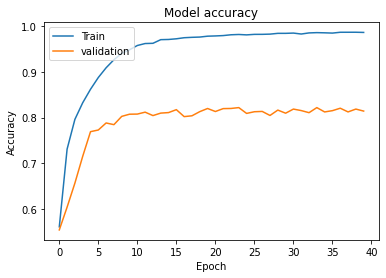

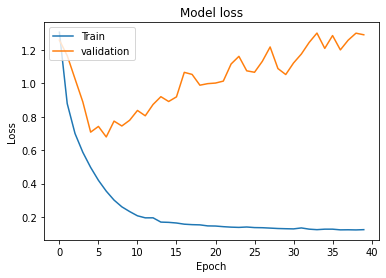

In [ ]:
import matplotlib.pyplot as plot

plot.plot(data.history['accuracy'])
plot.plot(data.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'validation'], loc='upper left')
plot.show()

plot.plot(data.history['loss'])
plot.plot(data.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'validation'], loc='upper left')
plot.show()

예측

In [ ]:
pred_proba = model.predict(X_test) 

pred_class = []

for i in pred_proba:
    pred = np.argmax(i)
    pred_class.append(pred)
    
pred_class = le.inverse_transform(pred_class)
pred_class[0:10]



array(['horse', 'truck', 'airplane', 'cat', 'bird', 'deer', 'airplane',
       'deer', 'airplane', 'deer'], dtype='<U10')

In [ ]:
import pandas as pd

sample_submission = pd.read_csv("/content/drive/MyDrive/멀티캠퍼스/data/sample_submission.csv")

sample_submission.target = pred_class
sample_submission.to_csv("submit_믹스업40나중.csv",index=False)

In [ ]:
sample_submission.head(20)

,id,target
0,0000.jpg,horse
1,0001.jpg,truck
2,0002.jpg,airplane
3,0003.jpg,cat
4,0004.jpg,bird
5,0005.jpg,deer
6,0006.jpg,airplane
7,0007.jpg,deer
8,0008.jpg,airplane
9,0009.jpg,deer
